In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
module = fc.eightb.feynnet

In [3]:
module

/store/user/ekoenig/8BAnalysis/NTuples/2018/feynnet
   Background
   NMSSM_XYY_YToHH_8b
   Run2_UL

In [4]:
bkg = ObjIter([Tree( module.Run2_UL18.QCD_B_List, altfile='test_{base}')])


100%|██████████| 16/16 [00:15<00:00,  1.04it/s]


In [5]:
bkg_feynnet = bkg.apply(lambda t : t.copy())
bkg_random = bkg.apply(lambda t : t.copy())

In [6]:
bkg_feynnet.apply(lambda t : eightb.load_feynnet_assignment(t, model=eightb.models.feynnet_mx_my_reweight.storage))

[None]

In [7]:
bkg_random.apply(lambda t : eightb.load_random_assignment(t))

[None]

100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


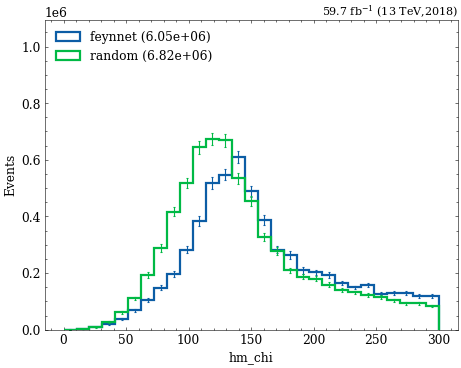

In [47]:
def h_dm2(t):
    return (t.h_m-125)**2
def hm_chi(t):
    return np.sqrt( ak.sum( h_dm2(t), axis=1 ) )
hm_chi.bins = (0,300,30)

study.quick(
    bkg_feynnet+bkg_random, 
    stacked=False, legend=True,
    label=['feynnet','random'],
    h_color=None,
    varlist=[hm_chi],
)

In [48]:
feynnet_h_dm, random_h_dm = (bkg_feynnet+bkg_random).apply(h_dm2)

In [52]:
feynnet_corr = np.array([ ak.corr(feynnet_h_dm[:,int(i)], feynnet_h_dm[:,int(j)]) for i in range(4) for j in range(i+1, 4) ])

In [53]:
random_corr = np.array([ ak.corr(random_h_dm[:,int(i)], random_h_dm[:,int(j)]) for i in range(4) for j in range(i+1, 4) ])

In [56]:
feynnet_corr, random_corr

(array([ 0.00973401, -0.00885883, -0.01740637, -0.01830729, -0.01573457,
         0.01443029], dtype=float32),
 array([ 0.00082913, -0.00856237, -0.01335623, -0.0130648 , -0.01015591,
         0.00564899], dtype=float32))

In [54]:
feynnet_corr/random_corr

array([11.740083 ,  1.0346233,  1.3032397,  1.4012687,  1.5493013,
        2.5544899], dtype=float32)

100%|██████████| 8/8 [00:03<00:00,  2.43it/s]


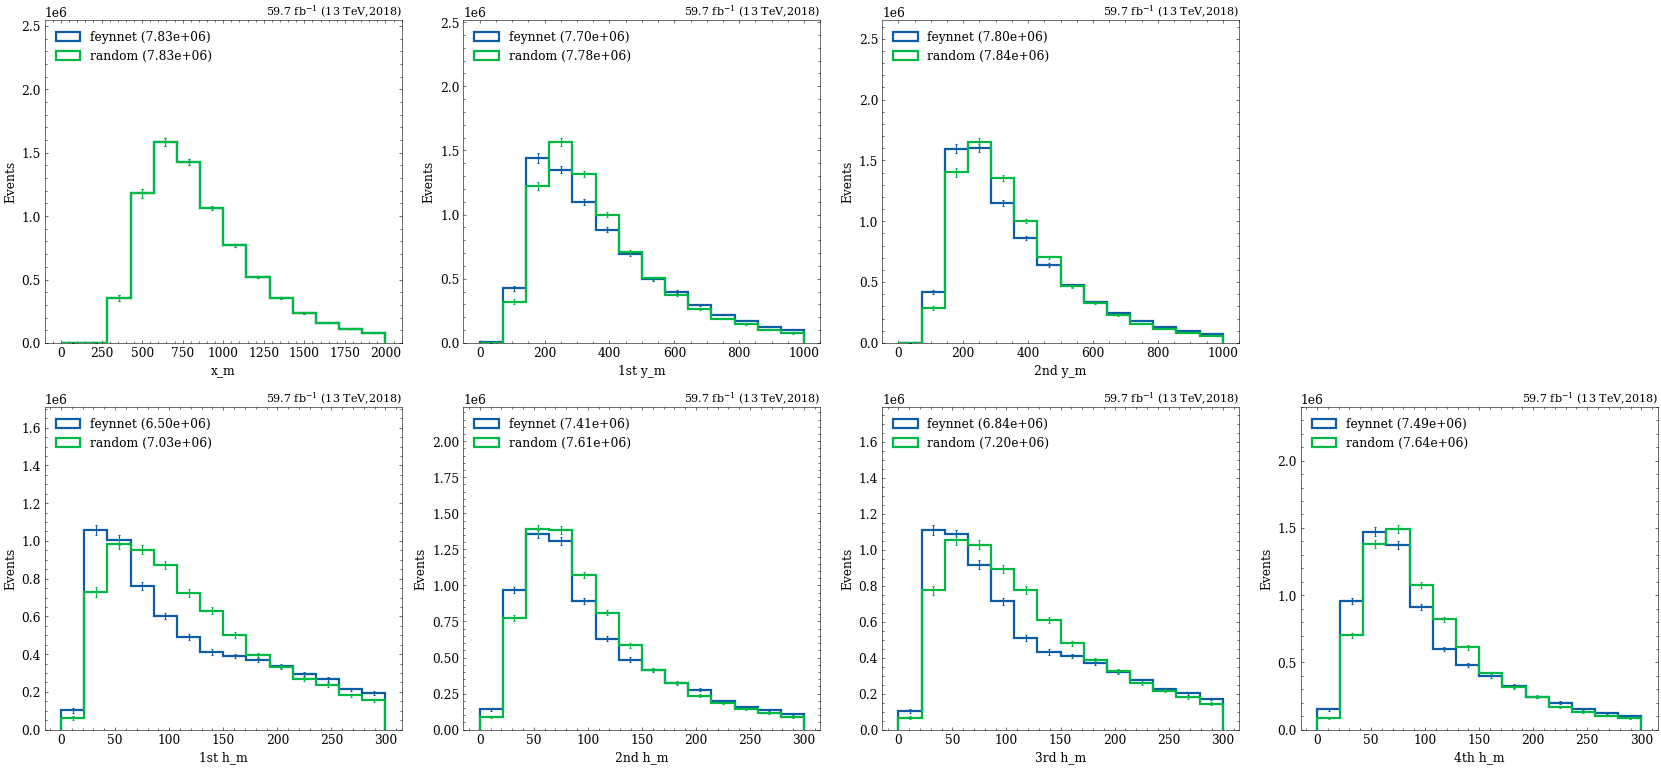

In [20]:
study.quick(
    bkg_feynnet+bkg_random, 
    stacked=False, legend=True,
    label=['feynnet','random'],
    h_color=None,
    varlist=['x_m','y_m[:,0]','y_m[:,1]',None]+[f'h_m[:,{i}]' for i in range(4)],
    binlist=[(0,2000,30)]+[(0,1000,30)]*3+[(0,300,30)]*4,
    h_rebin=15,
)

100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


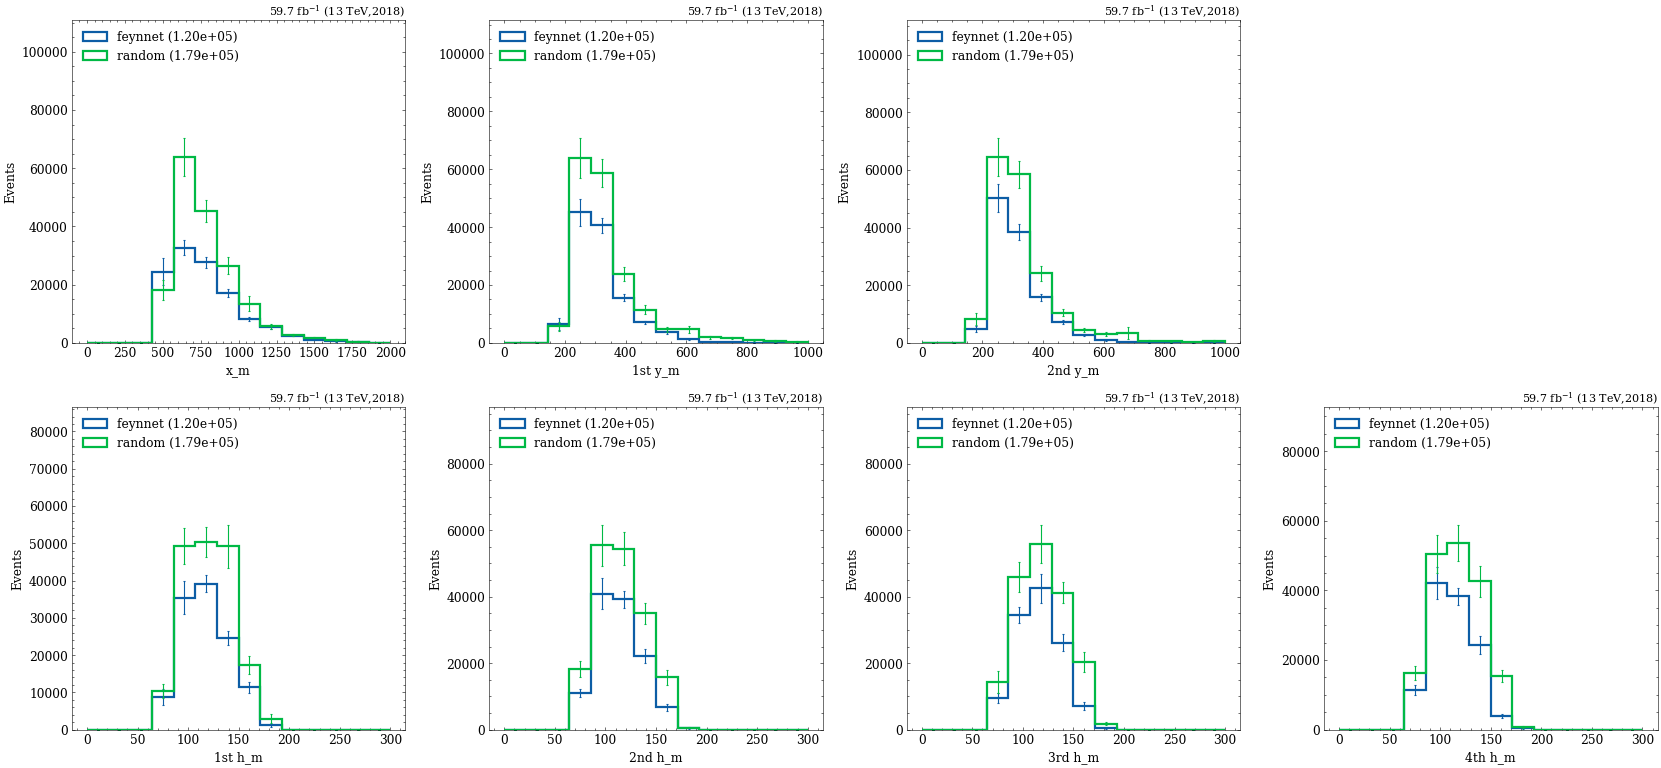

In [19]:
study.quick(
    bkg_feynnet+bkg_random, 
    masks=lambda t:hm_chi(t)<60,
    stacked=False, legend=True,
    label=['feynnet','random'],
    h_color=None,
    varlist=['x_m','y_m[:,0]','y_m[:,1]',None]+[f'h_m[:,{i}]' for i in range(4)],
    binlist=[(0,2000,20)]+[(0,1000,20)]*3+[(0,300,20)]*4,
    h_rebin=15,
)

100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


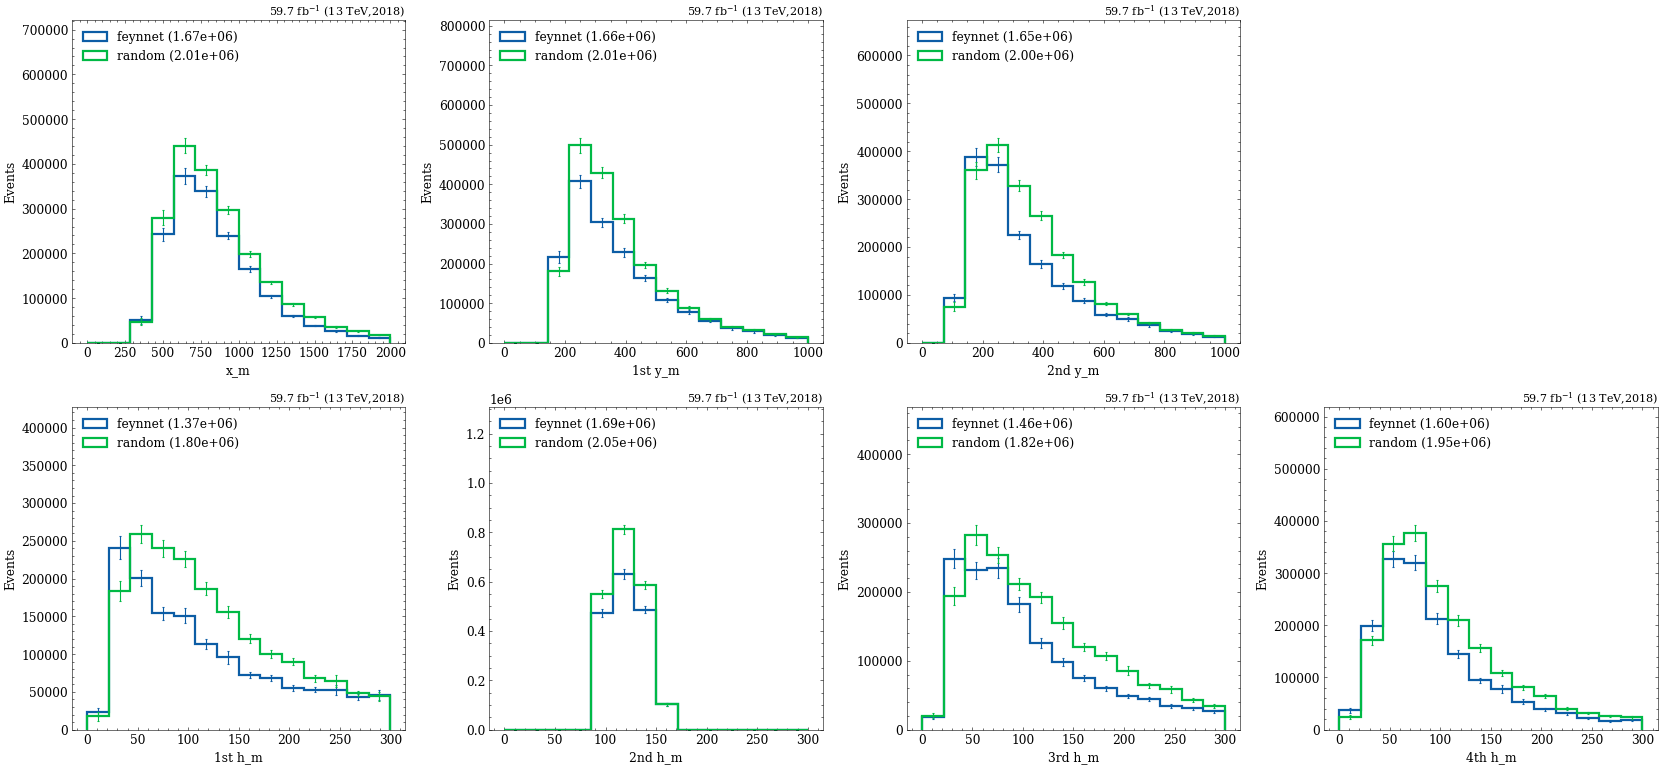

In [25]:
study.quick(
    bkg_feynnet+bkg_random, 
    masks=lambda t: abs(t.h_m[:,1]-125)<30,
    stacked=False, legend=True,
    label=['feynnet','random'],
    h_color=None,
    varlist=['x_m','y_m[:,0]','y_m[:,1]',None]+[f'h_m[:,{i}]' for i in range(4)],
    binlist=[(0,2000,20)]+[(0,1000,20)]*3+[(0,300,20)]*4,
    h_rebin=15,
)

100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


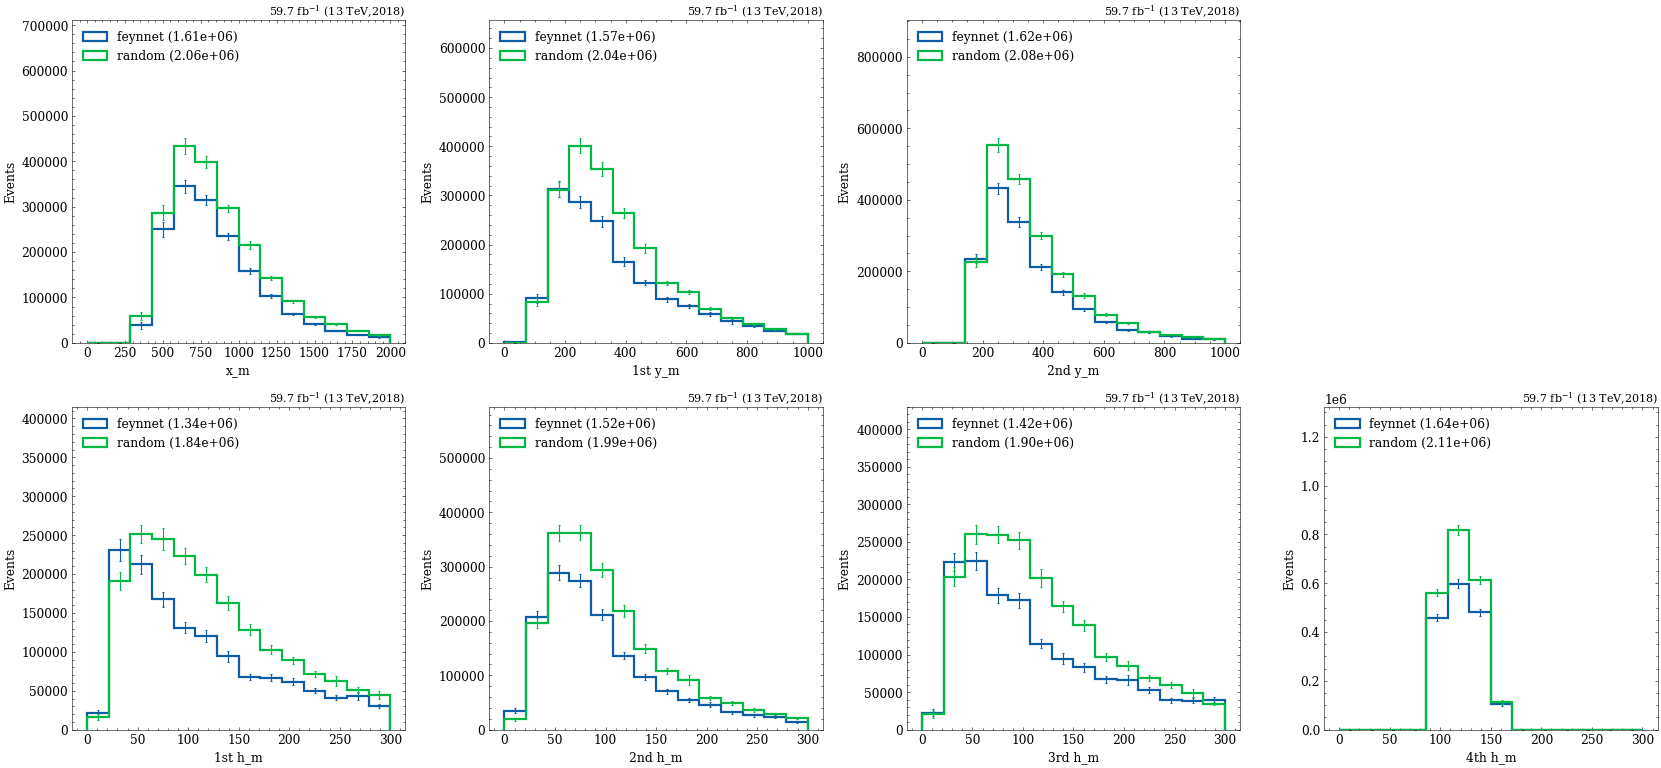

In [26]:
study.quick(
    bkg_feynnet+bkg_random, 
    masks=lambda t: abs(t.h_m[:,3]-125)<30,
    stacked=False, legend=True,
    label=['feynnet','random'],
    h_color=None,
    varlist=['x_m','y_m[:,0]','y_m[:,1]',None]+[f'h_m[:,{i}]' for i in range(4)],
    binlist=[(0,2000,20)]+[(0,1000,20)]*3+[(0,300,20)]*4,
    h_rebin=15,
)